#### CallCounts.csv contains incoming call counts in hourly buckets over a year for a call center. Generate and evaluate a set of hypotheses to check if any seasonal factors are significant determinants of the call counts. Based on this analysis, fit a named statistical distribution to  the data (e.g. Gaussian, Beta etc.). Clearly state any assumptions made and justify your choice of distribution logically.

In [4]:
# importing the essential library to read the dataset
import pandas as pd

path_dataset = 'CallCounts.csv' 

df_dataset = pd.read_csv(path_dataset)

df_dataset = df_dataset.loc[:, ~df_dataset.columns.str.contains('^Unnamed')]

df_dataset.head()

,CallCountsPerHour
0,65
1,61
2,66
3,61
4,54


### Creating a Season column considering that the first day of the year was january 1 is at index 0 first hour of the calls


In [17]:
# Define a function to map the season based on the total hours
def get_season(total_hours):
    if 0 <= total_hours < 2184:  # Winter: 0-2183 hours
        return 'Winter'
    elif 2184 <= total_hours < 4368:  # Spring: 2184-4367 hours
        return 'Spring'
    elif 4368 <= total_hours < 6552:  # Summer: 4368-6551 hours
        return 'Summer'
    else:  # Fall: 6552+ hours
        return 'Fall'

# Reset the index to convert the hour index to a column
df_dataset = df_dataset.reset_index()

# Create a new column 'Season' by applying the 'get_season' function to the 'index' column
df_dataset['Season'] = df_dataset['index'].apply(get_season)

# Drop the 'index' column if desired
df_dataset = df_dataset.drop('index', axis=1)

df_dataset.head()

,CallCountsPerHour,Season
0,65,Winter
1,61,Winter
2,66,Winter
3,61,Winter
4,54,Winter


In [18]:
print('Total Number of Hours per Season\n ')
print(df_dataset['Season'].value_counts())

Total Number of Hours per Season
 
Winter    2184
Spring    2184
Summer    1872
Name: Season, dtype: int64


In [19]:
df_winter = df_dataset[df_dataset['Season']=='Winter']
print('Sum of call hours in the winter {} \n'.format(df_winter['CallCountsPerHour'].sum()))
df_spring = df_dataset[df_dataset['Season']=='Spring']
print('Sum of call hours in the Spring {} \n'.format(df_spring['CallCountsPerHour'].sum()))
df_Summer = df_dataset[df_dataset['Season']=='Summer']
print('Sum of call hours in the Summer {} \n'.format(df_Summer['CallCountsPerHour'].sum()))

Sum of call hours in the winter 130188 

Sum of call hours in the Spring 130850 

Sum of call hours in the Summer 112064 



#### From sum of the calls per hours per season it can be deduced that season is a factor of lower number of calls

#### Creating Hypothesis
**Null Hypothesis:** The average number of calls per hour is the same across all seasons. 

**Alternative Hypothesis:** The average number of calls per hour differs across at least one pair of seasons.
##### We Choose p-value (Significance_Value) = 0.05 In Test value produce are higher we reject null hypostesis

In [21]:
import pandas as pd
import scipy.stats as stats


# Create separate data series for each season
winter_calls = df_dataset[df_dataset['Season'] == 'Winter']['CallCountsPerHour']
spring_calls = df_dataset[df_dataset['Season'] == 'Spring']['CallCountsPerHour']
summer_calls = df_dataset[df_dataset['Season'] == 'Summer']['CallCountsPerHour']


# Perform one-way ANOVA test 
f_statistic, p_value = stats.f_oneway(winter_calls, spring_calls, summer_calls)

# Print the test results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.9411285672299892
p-value: 0.3902426379448495


#### From the F-Statistic Value obtained and P-value we reject the Null Hypothesis and We understand that average number of call differ accross seasons.


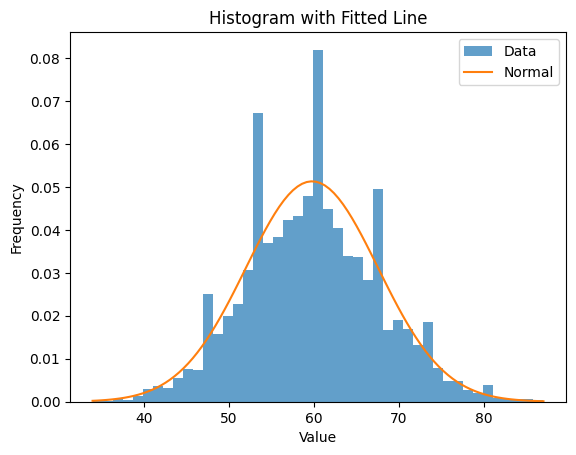

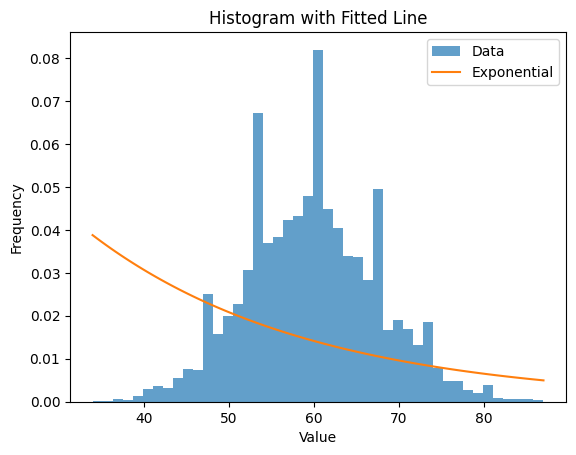

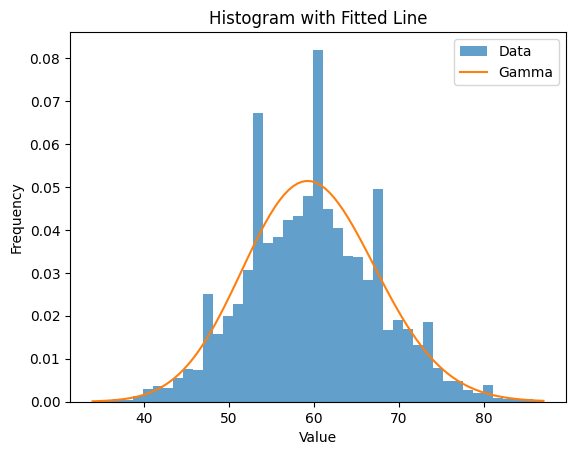

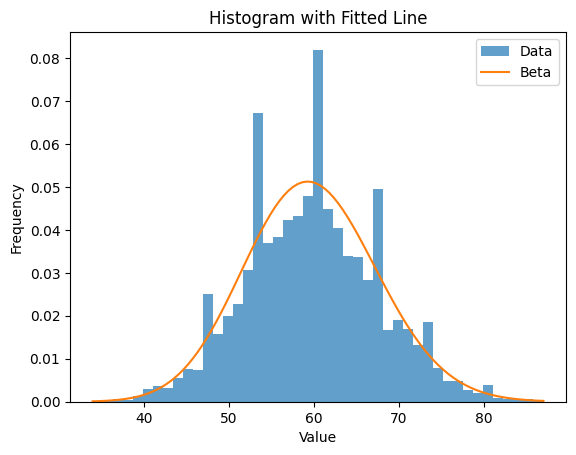

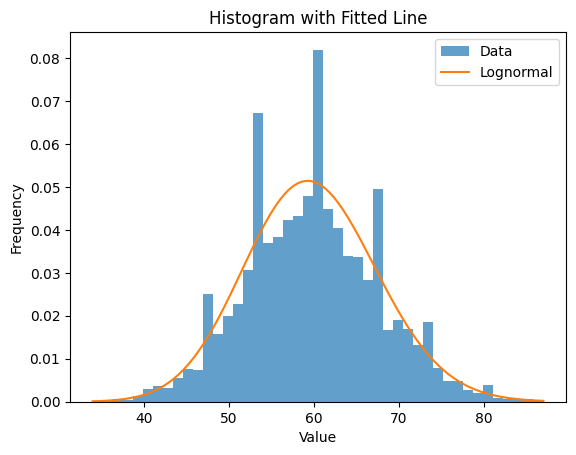

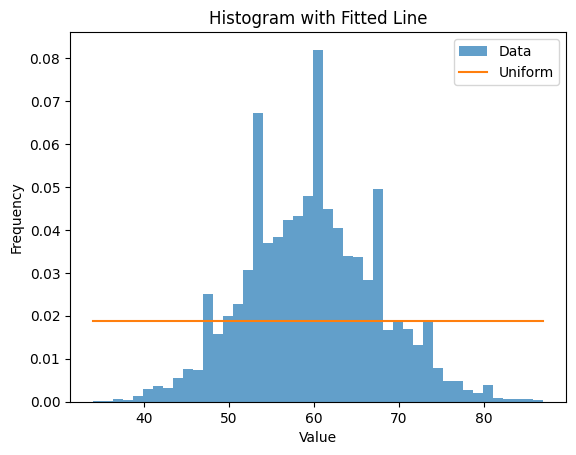

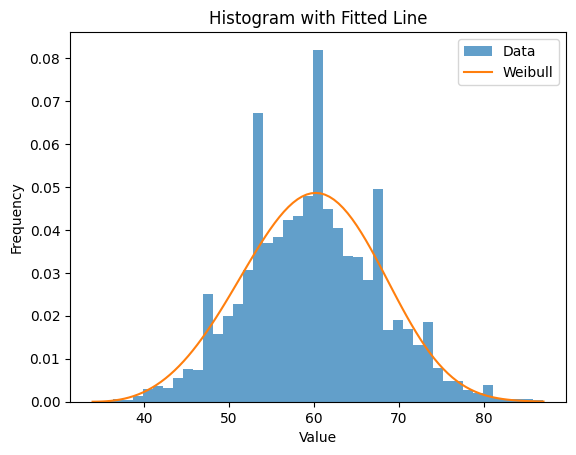

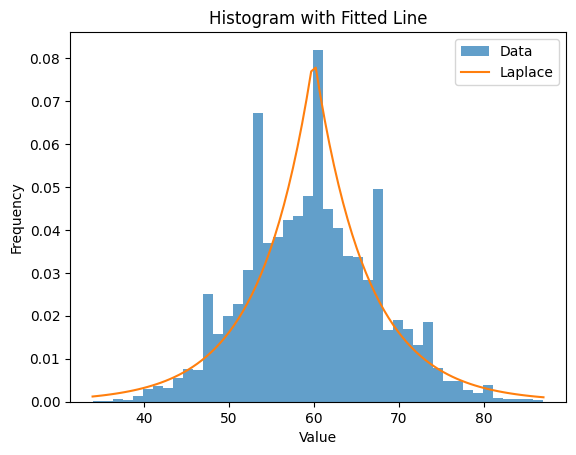

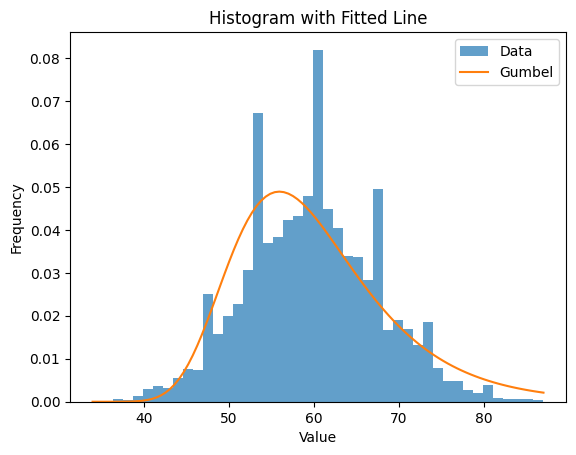

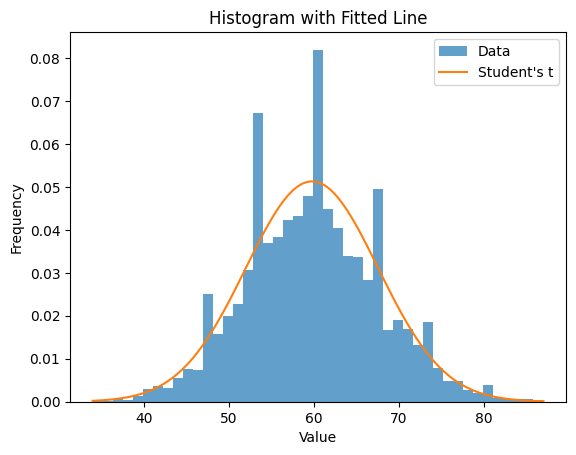

Best fit distribution: gamma


In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = df_dataset['CallCountsPerHour']

distributions = [stats.norm, stats.expon, stats.gamma, stats.beta, stats.lognorm,
                stats.uniform, stats.weibull_min, stats.laplace, stats.gumbel_r,
                stats.t]
distribution_names = ['Normal', 'Exponential', 'Gamma', 'Beta', 'Lognormal',
                      'Uniform', 'Weibull', 'Laplace', 'Gumbel', 'Student\'s t']


# Initialize variables to store the best BCI and best fit distribution
best_bci = np.inf
best_fit = None

# Iterate through each distribution and find the best fit using BCI
for distribution, dist_name in zip(distributions, distribution_names):
    # Fit the distribution to the data
    params = distribution.fit(data)
    # Calculate the log-likelihood of the fitted distribution
    log_likelihood = distribution.logpdf(data, *params).sum()
    # Calculate the number of parameters in the distribution
    num_params = len(params)
    # Calculate the BCI value
    bci = -2 * log_likelihood + num_params * np.log(len(data))
    
    # Update the best BCI and best fit distribution if the current BCI is lower
    if bci < best_bci:
        best_bci = bci
        best_fit = distribution
        
    # Plot the histogram
    plt.hist(data, bins='auto', density=True, alpha=0.7, label='Data')
    
    # Generate x-values for the fitted line
    x = np.linspace(np.min(data), np.max(data), 100)
    # Plot the fitted line
    plt.plot(x, distribution.pdf(x, *params), label=dist_name)
    
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram with Fitted Line')
    plt.legend()
    plt.show()

# Print the best fit distribution
print("Best fit distribution:", best_fit.name)

##### Since our data is continuous we only fit continuous distributions.
### We see from Bayseian Criterion Information (BCI), a formulated approach to find the best fit distribution, that the gamma distribution best fit our data. 